In [52]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets,layers,models

In [53]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
#Image_Shape+(3), = (224,224,3) => Giving the RGB Channel

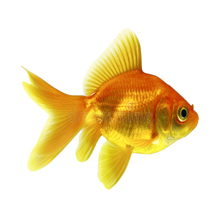

In [25]:
gold_fish = Image.open('goldfish.jpg').resize((224,224))
gold_fish

In [26]:
gold_fish = np.array(gold_fish)
gold_fish = gold_fish/255
gold_fish.shape

(224, 224, 3)

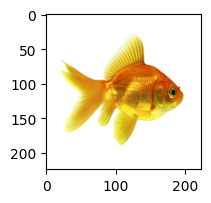

In [27]:
plt.figure(figsize=(2,10))
plt.imshow(gold_fish)

In [28]:
gold_fish = gold_fish[np.newaxis,...]
# 1 image of 224*224*3

In [29]:
gold_fish.shape
# 1 image of 224*224*3

(1, 224, 224, 3)

In [33]:
result = classifier.predict(gold_fish)
print("Class no: ",np.argmax(result))

1/1 [==============================] - 0s 29ms/step
Class no:  2


In [34]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower',origin=dataset_url,cache_dir='.',untar = True)
#'flower: file name', cache_dir  = '.' means default directory, untar = true means zip file, uzip it 

In [35]:
data_dir

'.\\datasets\\flower'

In [36]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower')

In [38]:
list(data_dir.glob('*/*.jpg'))[:3]

[WindowsPath('datasets/flower/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower/daisy/10172379554_b296050f82_n.jpg')]

In [39]:
flower_dict = {
   'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [40]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [41]:
x = []
y = []
for flower_name,images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(224,224))
        x.append(resize_img)
        y.append(flower_labels_dict[flower_name])

In [42]:
x = np.array(x)
y = np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [44]:
x_train = x_train / 255
x_test = x_test / 255

In [47]:
x_test.shape

(918, 224, 224, 3)

In [48]:
ypred = classifier.predict(x_test)

29/29 [==============================] - 8s 288ms/step


In [50]:
ypred = [np.argmax(i) for i in ypred]
ypred

[986,
 986,
 947,
 866,
 947,
 750,
 739,
 884,
 945,
 89,
 986,
 986,
 329,
 724,
 731,
 947,
 986,
 974,
 945,
 986,
 335,
 310,
 92,
 361,
 739,
 550,
 947,
 724,
 724,
 997,
 510,
 947,
 74,
 986,
 986,
 986,
 329,
 819,
 798,
 585,
 108,
 739,
 717,
 451,
 74,
 495,
 986,
 426,
 335,
 673,
 739,
 724,
 750,
 681,
 986,
 327,
 806,
 947,
 108,
 724,
 108,
 74,
 310,
 984,
 986,
 724,
 329,
 553,
 704,
 724,
 23,
 302,
 108,
 945,
 986,
 644,
 724,
 986,
 841,
 108,
 773,
 109,
 540,
 986,
 986,
 503,
 74,
 724,
 937,
 335,
 310,
 947,
 329,
 108,
 615,
 739,
 986,
 460,
 986,
 986,
 948,
 310,
 841,
 948,
 717,
 912,
 724,
 986,
 507,
 944,
 724,
 884,
 986,
 109,
 724,
 986,
 108,
 540,
 739,
 507,
 592,
 986,
 937,
 884,
 986,
 108,
 947,
 948,
 108,
 947,
 329,
 739,
 986,
 986,
 407,
 986,
 108,
 886,
 109,
 947,
 974,
 429,
 724,
 990,
 986,
 986,
 507,
 859,
 553,
 47,
 986,
 310,
 644,
 853,
 945,
 986,
 884,
 563,
 986,
 109,
 553,
 794,
 986,
 724,
 108,
 724,
 937,
 986,


In [51]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [63]:
transfer_learn = models.Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(5,activation = 'softmax')
])


transfer_learn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
transfer_learn.fit(x_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 31s 343ms/step - loss: 0.8790 - accuracy: 0.6726
Epoch 2/5
86/86 [==============================] - 25s 295ms/step - loss: 0.4228 - accuracy: 0.8576
Epoch 3/5
86/86 [==============================] - 25s 293ms/step - loss: 0.3296 - accuracy: 0.8946
Epoch 4/5
86/86 [==============================] - 25s 293ms/step - loss: 0.2713 - accuracy: 0.9139
Epoch 5/5
86/86 [==============================] - 25s 295ms/step - loss: 0.2367 - accuracy: 0.9281


In [65]:
transfer_learn.evaluate(x_test,y_test)

29/29 [==============================] - 9s 295ms/step - loss: 0.3948 - accuracy: 0.8617


[0.3948122560977936, 0.8616557717323303]